In [6]:
import pandas as pd
import numpy as np

dfinv = pd.read_csv("./fct_invoice.csv")
dfcus = pd.read_json("./dim_customer.json")

dfcus

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [8]:
# EASY 1: How many unique customers are in the dataset?

dfinv.nunique()['customer_id']

5191

In [12]:
# EASY 2: What are the different categories of products available? How many unique categories are there?
print(dfinv['category'].unique())
print (str(dfinv.nunique()['category']) +' total categories')

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8 total categories


In [16]:
# EASY 3: Which payment method is the most popular? How many times was it used?
print(dfinv.groupby('payment_method').size())

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64


In [20]:
# MEDIUM 1: What are the 3 most popular categories, by total sales?
dfinv['sales'] = dfinv['quantity']*dfinv['price']
category_sales = dfinv.groupby('category')['sales'].sum()
top_category = category_sales.sort_values(ascending = False).head(3)
print(top_category)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [22]:
# MEDIUM 2: What are the total sales attributed to customers over the age of 45?
merged_df = dfinv.merge(dfcus, how='inner', left_on='customer_id', right_on='id')

customers_45 = merged_df[merged_df['age'] >45]
sales_45=customers_45['quantity']*customers_45['price']
print(sales_45.sum())

82039768.15


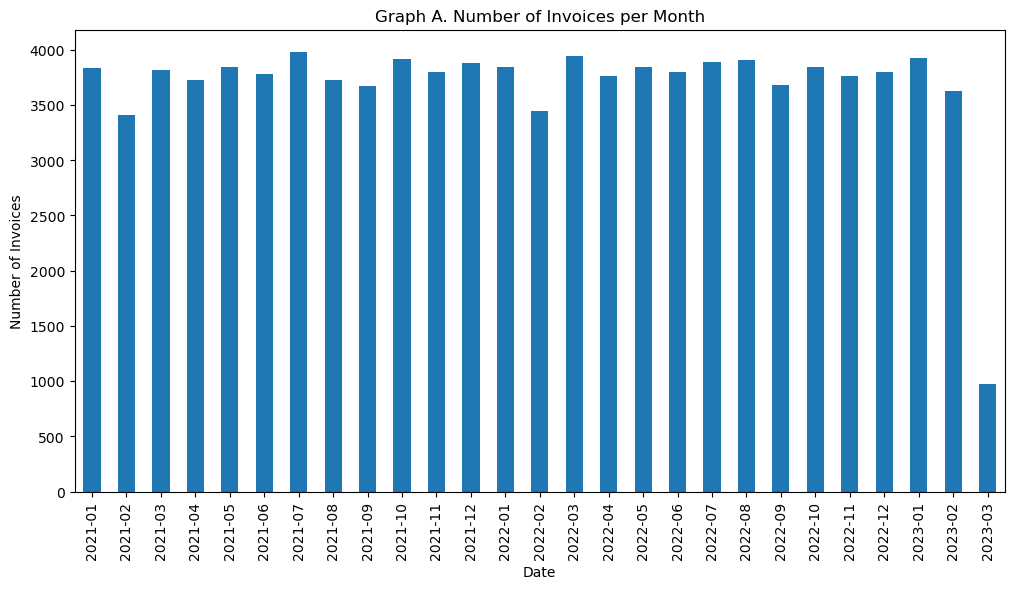

In [24]:
# MEDIUM 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
import matplotlib.pyplot as plt

dfinv['invoice_date'] = pd.to_datetime(dfinv['invoice_date'], dayfirst=True)
dfinv['dates'] = dfinv['invoice_date'].dt.to_period('M')

dfinv['dates'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
# Plotting the data

plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.title('Graph A. Number of Invoices per Month')
plt.show()

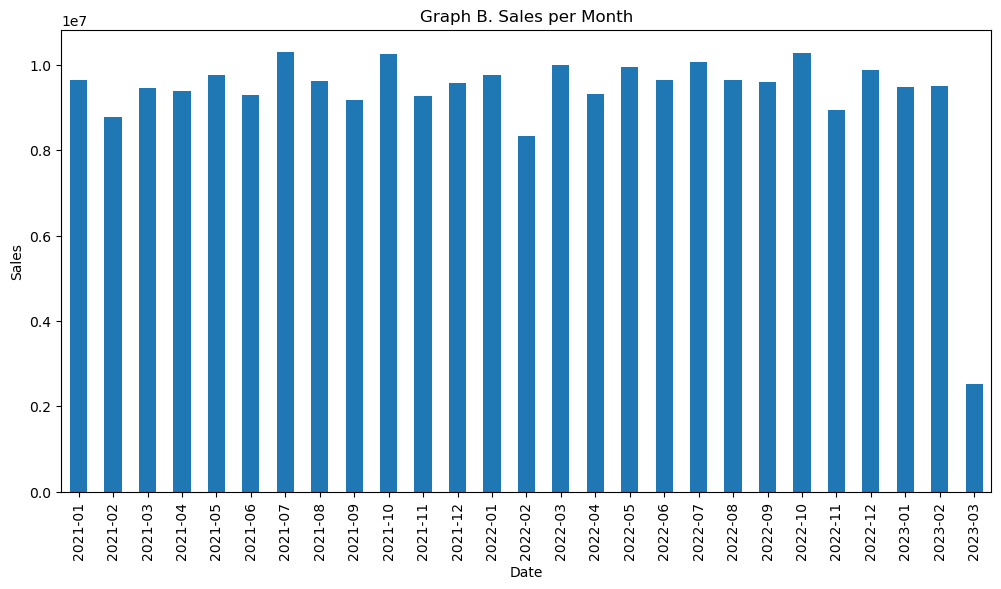

In [26]:
dfinv['sales'] = dfinv['quantity']*dfinv['price']
dfinv['invoice_date'] = pd.to_datetime(dfinv['invoice_date'], dayfirst=True)

dfinv['month_year'] = dfinv['invoice_date'].dt.to_period('M')
monthly_sales = dfinv.groupby('month_year')['sales'].sum().sort_index()
monthly_sales.plot(kind='bar',figsize=(12,6))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Graph B. Sales per Month')
plt.show()

In [28]:
# It can be observed that transactions and sales usually decrease during the months of February. There were increased sales on 7/2021, 10/2021. 7/2022, and 11/2022. This suggests an increase in transactions/sales due to holiday seasons, mid-year sales, and the like. 

In [30]:
# HARD 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
merged_df = dfinv.merge(dfcus, how='inner', left_on='customer_id', right_on='id')
merged_df['sales'] = merged_df['quantity']*merged_df['price']

#age ranges
bins = [10,20,30,40,50,60,70,80,90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged_df['age_ranges'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

merged_df.pivot_table(index = 'category',columns='age_ranges', values = 'sales', aggfunc='sum')

age_ranges,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
